In [449]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/2deezer2/-Auto-pricing-mashinki-/main/Data.csv')

In [450]:
data['Ежегодный пробег'] = data['Ежегодный пробег'].fillna(data['Mileage'])
data['Средний срок владения'] = data['Средний срок владения'].fillna(0)

#**Проверка гипотез**

**Гипотеза 1:** Чем новее модель автомобиля, тем выше цена на него.

Для проверки данной гипотезы можно использовать корреляционный анализ.

In [451]:
import numpy as np
from scipy.stats import pearsonr

data['Age'] = 2023 - data['Year']

# вычисление коэффициента корреляции Пирсона
corr, _ = pearsonr(data['Age'], data['Price'])

# вывод результата
if corr > 0:
    print('Есть положительная корреляция между возрастом модели и ценой на автомобиль')
else:
    print('Есть отрицательная корреляции между возрастом модели и ценой на автомобиль')
print(f'Коэффициент корреляции: {corr:.2f}')

Есть отрицательная корреляции между возрастом модели и ценой на автомобиль
Коэффициент корреляции: -0.56


Для определения статистической значимости и проверки нулевой гипотезы (нет корреляции между возрастом модели и ценой на автомобиль) можно использовать t-тест Стьюдента.

In [452]:
from scipy.stats import t
from numpy import sqrt

# вычисление длины выборки
n = len(data)

# вычисление значения t-статистики
t_stat = corr * sqrt(n - 2) / sqrt(1 - corr**2)

# определение уровня значимости для t-теста
alpha = 0.05

# определение критической области
cv = t.ppf(1 - alpha / 2, n - 2)

# вывод результата
if abs(t_stat) > cv:
    print('Корреляция между возрастом модели и ценой на автомобиль является статистически значимой')
else:
    print('Корреляция между возрастом модели и ценой на автомобиль не является статистически значимой')
print(f't-статистика: ', t_stat)

Корреляция между возрастом модели и ценой на автомобиль является статистически значимой
t-статистика:  -176.61363417271056


Корреляция между возрастом модели и ценой на автомобиль является статистически значимой, поэтому мы можем сделать вывод о том, что существует значимая связь между возрастом автомобиля и его ценой. В данном случае, коэффициент корреляции отрицательный, соответственно можно сделать вывод о том, что на рынке автомобилей более старших лет цены ниже, чем на более новые модели.

Вывод: гипотеза 1 подтвердилась.

**Гипотеза 2:** Цена на автомобиль тем меньше, чем больше его пробег

In [453]:
corr, pval = pearsonr(data['Mileage'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и пробегом')
else:
    print('Нет статистически значимой зависимости между ценой и пробегом')

Коэффициент корреляции: -0.482
P-value: 0.000
Существует статистически значимая зависимость между ценой и пробегом


Так как значение P-value меньше 0.05, то существует статистически значимая зависимость между ценой и пробегом, а коэффициент корреляции Пирсона -0.482 говорит о том, что присутствует отрицательная корреляционная связь между ценой и пробегом, то есть чем больше пробег, тем ниже цена на автомобиль. Вывод: гипотеза подтвердилась.

**Гипотеза 3:** Автомобили, которые имеют наменьшее количество владельцев, стоят дороже.

In [454]:
corr, pval = pearsonr(data['Number_of_owners'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и количеством владельцев')
else:
    print('Нет статистически значимой зависимости между ценой и количеством владельцев')

Коэффициент корреляции: -0.584
P-value: 0.000
Существует статистически значимая зависимость между ценой и количеством владельцев


Исходя из полученных результатов, можно сделать вывод, что между ценой и пробегом существует отрицательная связь. Коэффициент корреляции равен -0,584, что говорит о том, что с увеличением пробега цена на автомобиль снижается.

P-value, равное 0, означает, что вероятность получить такой или еще более выраженный коэффициент корреляции при отсутствии связи между переменными крайне мала, что говорит о статистической значимости полученной зависимости.

Таким образом, можно сделать вывод, что между ценой и пробегом существует статистически значимая зависимость, и пробег может быть одним из факторов, влияющих на цену автомобиля. Вывод: гипотеза подтвердилась

**Гипотеза 4:**
Цена на автомобиль зависит от того, где он сейчас находится (регион продажи).

Строго проверять данную гипотезу не представляется возможным. Поэтому воспользуемся методом пристального взгляда и попробуем посмотреть на картинки.

In [455]:
import matplotlib.pyplot as plt

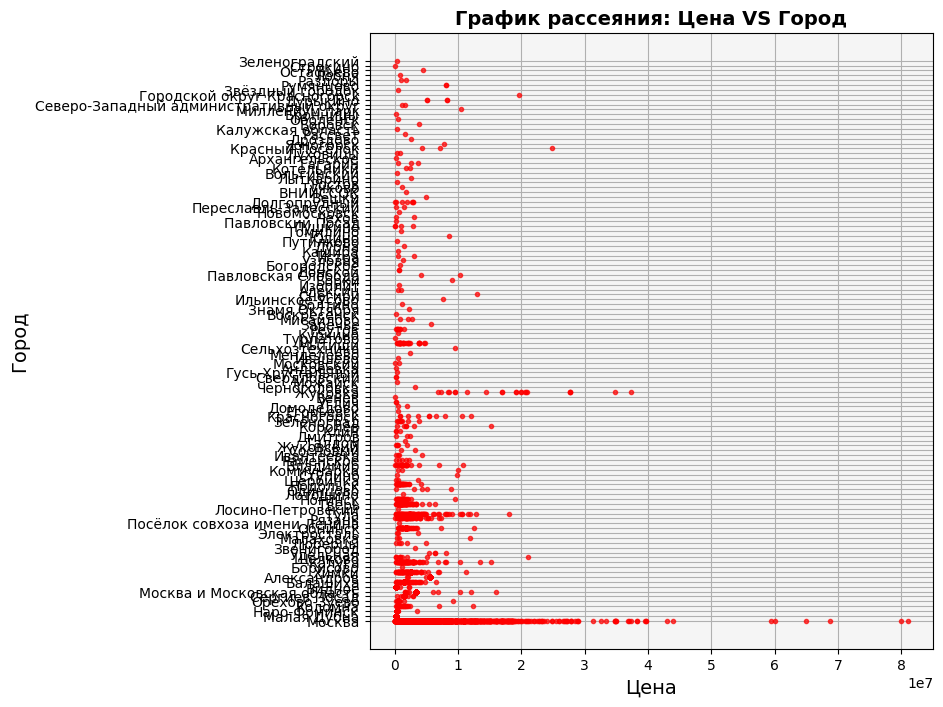

In [456]:
fig = plt.figure(figsize=(16, 8))

plt1 = fig.add_subplot(1,2,1)

plt1.plot(data['Price'],data['Region'], 'r.',alpha=0.7)

plt1.set_xlabel('Цена', fontsize = 14)
plt1.set_ylabel('Город', fontsize = 14)
plt1.set_title('График рассеяния: Цена VS Город', weight = 'bold', fontsize = 14)
plt1.set_facecolor('whitesmoke')
plt1.grid(True)

По данному графику можно видеть, что некоторая взаимосвязь между ценой и городом есть, но присутствует она только в отношении Москвы и Питера, так как именно там продают самые дорогие автомобили. Плюс, можно смело говорить, что линейной взаимосвязи точно нет.

Гипотеза 4 отвергается.

**Гипотеза 5:**
Автомобили, которые имеют большую мощность, имеют более высокую цену на рынке.

Посмотрим на диаграмму рассеяния.

In [457]:
import matplotlib.pyplot as plt
import numpy as np

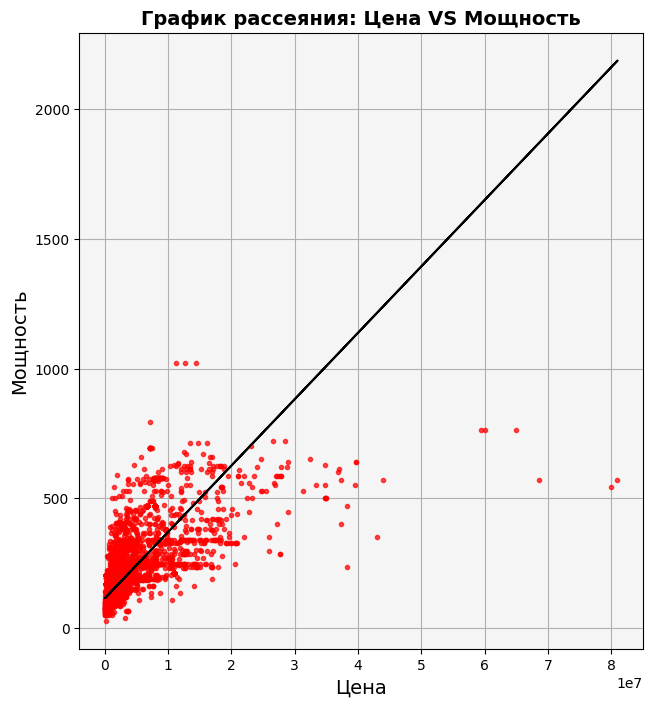

In [458]:
fig = plt.figure(figsize=(16, 8))

plt1 = fig.add_subplot(1,2,1)

plt1.plot(data['Price'],data['Power'], 'r.',alpha=0.7)

plt1.set_xlabel('Цена', fontsize = 14)
plt1.set_ylabel('Мощность', fontsize = 14)
plt1.set_title('График рассеяния: Цена VS Мощность', weight = 'bold', fontsize = 14)
plt1.set_facecolor('whitesmoke')
plt1.grid(True)

coeffs = np.polyfit(data['Price'], data['Power'], 1)
poly_line = np.poly1d(coeffs)
plt1.plot(data['Price'], poly_line(data['Price']), color = 'black')

Действительно, по графику допольно уверенно можно сказать, что зависимость есть (для этого я построила линейную регрессию на графике). Позже, при построении модели, мы посмотрим на коэффициенты и узнаем, насколько сильно мощность влияет на цену.

Можем также посчитать!

In [459]:
from scipy.stats import pearsonr
corr, pval = pearsonr(data['Mileage'], data['Price'])

# Вывод результатов корреляционного анализа
print(f'Коэффициент корреляции: {corr:.3f}')
print(f'P-value: {pval:.3f}')

if pval < 0.05:
    print('Существует статистически значимая зависимость между ценой и мощностью')
else:
    print('Нет статистически значимой зависимости между ценой и мощностью')

Коэффициент корреляции: -0.482
P-value: 0.000
Существует статистически значимая зависимость между ценой и мощностью


Вывод: гипотеза 5 не отвергается.

**Гипотеза 6:** Математическое ожидание цены при условии, что владельцев больше трех, равно математическому ожиданию цены при условии, что владельцев больше двух.

Для проверки данной гипотезы о равенстве математических ожиданий (при неравенстве как альтернативе) я буду использовать t-test, так как реальные дисперсии нам неизвестны. Возьмем уровень значимости в 5%.

In [460]:
df3 = data[data['Number_of_owners'] > 3] # взяла те автомобили, у которых больше трех владельцев было
mean_3 = df3['Price']
print('Средняя цена машин, у которых было более трех владельцев:', np.mean(mean_3))

Средняя цена машин, у которых было более трех владельцев: 331829.5163724654


In [461]:
df2 = data[data['Number_of_owners'] > 2] #а теперь те, у которых больше двух
mean_2 = df2['Price']
print('Средняя цена машин, у которых было более двух владельцев:', np.mean(mean_2))

Средняя цена машин, у которых было более двух владельцев: 854435.2601375746


In [462]:
import scipy.stats as sts

In [463]:
test = sts.ttest_ind(mean_3, mean_2, equal_var=False)
pval = test[1]
print('P-value = ', pval)

P-value =  0.0


P-value получился супер-пупер маленьким, так что наша гипотеза о равенстве математических ожиданий отвергается. На самом деле это вполне очевидно, так как выборочные средние по этим группам ну очень уж разные.

#**Машинное обучение**

В этом разделе мы построим модель для предсказания цены на автомобиль по остальным признакам. Сначала посмотрим на дефолтную линейную регрессию, а потом попробуем другие способы для улучшения.

Я сразу уберу некоторые признаки, которые будут слишком много места, если я их преобразую в количественные. Например, город: 257 новых столбцов явно нам не нужны. Аналогично поступаем с брендом, моделью машины, типом двигателя и др.


In [464]:
data = data.iloc[:, 2:]

In [465]:
from sklearn.preprocessing import OneHotEncoder #сегмент превращаю в количественный признак
data['Сегмент'] = data['Сегмент'].astype('category')
data['Сегмент_новый'] = data['Сегмент'].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    data[['Сегмент_новый']]).toarray())
df = data.join(enc_data)
df = df.drop(columns=['Сегмент_новый', 'Сегмент'])
df = df.iloc[:, :-1]

In [466]:
df = df.drop(columns=['Region', 'Brand', 'Type', 'Положение руля', 'Привод', 'Transmission', 'Engine_type', 'Age'])

In [467]:
df

,Custom,Number_of_owners,Year,Price,Mileage,Power,Ежегодный пробег,Средний срок владения,0,1
0,1,4,2000,310000.0,132000.0,79.0,5739.130435,0.089844,1.0,0.0
1,1,1,2022,3500000.0,4000.0,190.0,4000.000000,1.000000,0.0,1.0
2,1,1,2019,8000000.0,14000.0,469.0,3500.000000,4.000000,0.0,0.0
3,1,2,2011,310000.0,25000.0,80.0,2083.333333,3.000000,1.0,0.0
4,1,3,2018,2020000.0,61000.0,150.0,12200.000000,0.185185,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
66928,1,3,2013,2490000.0,120000.0,245.0,12000.000000,0.370370,0.0,0.0
66929,1,1,2019,9700000.0,61000.0,380.0,15250.000000,4.000000,0.0,0.0
66930,1,1,2018,5250000.0,159000.0,265.0,31800.000000,5.000000,0.0,0.0
66931,1,3,2013,2880000.0,96000.0,184.0,9600.000000,0.370370,0.0,0.0


In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
import numpy as np
from sklearn.model_selection import GridSearchCV

In [469]:
df = df.rename(columns={0: 'ECONOMY', 1: 'MEDIUM'})

In [470]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=10)


In [471]:
X_train = df_train.drop(columns=['Price'])
X_test = df_test.drop(columns=['Price'])
y_train = df_train['Price']
y_test = df_test['Price']

In [472]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [473]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MAE = ', mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print('MSE = ', mse)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred)
print('R2 = ', r2)

MAE =  931058.7255040645
MSE =  2510633774481.176
R2 =  0.7405669634746296


В целом R2 не такой ужасный, но мы попробуем всякие бусты.

Мне нравится XGBoost, попробуем его.

In [475]:
data = data.iloc[:, :-2]

In [476]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=10)
X_train = df_train.drop(columns=['Price'])
X_test = df_test.drop(columns=['Price'])
y_train = df_train['Price']
y_test = df_test['Price']

In [477]:
from xgboost import XGBRegressor
new_model = XGBRegressor(n_estimators=1000,learning_rate=0.03,random_state=1)
new_model.fit(X_train, y_train)
predictions = new_model.predict(X_test)

In [478]:
mae = metrics.mean_absolute_error(y_test, predictions)
print('MAE = ', mae)
mse = metrics.mean_squared_error(y_test, predictions)
print('MSE = ', mse)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test, predictions)
print('R2 = ', r2)

MAE =  60577.49708585055
MSE =  443858647831.004
R2 =  0.9541344508445329


R2 получился очень хороший! Модель существенно лучше!